In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# import data
brca_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/BRCA_HRD_confidence.tsv', sep='\t', index_col=0)
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.brca.rnaseq.unstranded.fpkm.counts.matrix.txt', sep='\t', index_col=0)

# Drop rows where event.BRCA1 is '1'
brca_df_filtered = brca_df[brca_df['event.BRCA1'] != '1']

# Drop rows where event.BRCA2 is 'Bi-allelic-undetermined'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.BRCA2'] != 'Bi-allelic-undetermined']

# Drop rows where event.PALB2 is '2'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.PALB2'] != '2']

# keep common samples

#idenfity the common samples

# Extract sample IDs from each dataframe
rnaseq_samples = set(rnaseq_df['Case ID'])
brca_samples = set(brca_df_filtered.index)

# Find the intersection of all sample IDs
common_samples = rnaseq_samples.intersection(brca_samples)

# Print the number of common samples
print("\nNumber of common samples:", len(common_samples))

# Drop samples that are not common in all three dataframes
rnaseq_df_common = rnaseq_df[rnaseq_df['Case ID'].isin(common_samples)]
brca_df_common = brca_df_filtered[brca_df_filtered.index.isin(common_samples)]

# Print the shapes of the new dataframes
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("brca_df_common:", brca_df_common.shape)


Number of common samples: 811
rnaseq_df_common: (872, 60663)
brca_df_common: (811, 41)


In [4]:
# filter to top 2 percent of differentially expressed genes
deseq_results=pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/deseq_bottom_2_percent.tsv', sep = '\t', index_col=0)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# import data
brca_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/BRCA_HRD_confidence.tsv', sep='\t', index_col=0)
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.brca.rnaseq.unstranded.fpkm.counts.matrix.txt', sep='\t', index_col=0)

# Drop rows where event.BRCA1 is '1'
brca_df_filtered = brca_df[brca_df['event.BRCA1'] != '1']

# Drop rows where event.BRCA2 is 'Bi-allelic-undetermined'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.BRCA2'] != 'Bi-allelic-undetermined']

# Drop rows where event.PALB2 is '2'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.PALB2'] != '2']

# keep common samples

#idenfity the common samples

# Extract sample IDs from each dataframe
rnaseq_samples = set(rnaseq_df['Case ID'])
brca_samples = set(brca_df_filtered.index)

# Find the intersection of all sample IDs
common_samples = rnaseq_samples.intersection(brca_samples)

# Print the number of common samples
print("\nNumber of common samples:", len(common_samples))

# Drop samples that are not common in all three dataframes
rnaseq_df_common = rnaseq_df[rnaseq_df['Case ID'].isin(common_samples)]
brca_df_common = brca_df_filtered[brca_df_filtered.index.isin(common_samples)]

# Print the shapes of the new dataframes
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("brca_df_common:", brca_df_common.shape)


Number of common samples: 811
rnaseq_df_common: (872, 60663)
brca_df_common: (811, 41)


In [ ]:
# Check for duplicates in rnaseq_df_common's Case ID
print("Duplicate Case IDs in rnaseq_df:", rnaseq_df_common['Case ID'].duplicated().sum())

# Drop duplicates in rnaseq_df_common if any
rnaseq_df_common = rnaseq_df_common.drop_duplicates(subset=['Case ID'])

# Verify the shapes after removing duplicates
print("\nAfter removing duplicates:")
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("brca_df_common:", brca_df_common.shape)

# Verify that we have exactly the same samples in both dataframes
rnaseq_samples = set(rnaseq_df_common['Case ID'])
brca_samples = set(brca_df_common.index)
print("\nSamples match:", rnaseq_samples == brca_samples)
print("Number of samples in each:", len(rnaseq_samples), len(brca_samples))

Duplicate Case IDs in rnaseq_df: 61

After removing duplicates:
rnaseq_df_common: (811, 60663)
brca_df_common: (811, 41)

Samples match: True
Number of samples in each: 811 811


In [ ]:
rnaseq_df_common.head()

,Case ID,Sample ID,Sample Type,ENSG00000000003.15|TSPAN6|protein_coding,ENSG00000000005.6|TNMD|protein_coding,ENSG00000000419.13|DPM1|protein_coding,ENSG00000000457.14|SCYL3|protein_coding,ENSG00000000460.17|C1orf112|protein_coding,ENSG00000000938.13|FGR|protein_coding,ENSG00000000971.16|CFH|protein_coding,...,ENSG00000288661.1|AL451106.1|protein_coding,ENSG00000288662.1|AC092910.4|lncRNA,ENSG00000288663.1|AC073611.1|lncRNA,ENSG00000288665.1|AC136977.1|lncRNA,ENSG00000288667.1|AC078856.1|lncRNA,ENSG00000288669.1|AC008763.4|protein_coding,ENSG00000288670.1|AL592295.6|lncRNA,ENSG00000288671.1|AC006486.3|protein_coding,ENSG00000288674.1|AL391628.1|protein_coding,ENSG00000288675.1|AP006621.6|protein_coding
0,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,1.0276,0.0000,74.2709,1.3816,1.6749,1.4166,5.2410,...,0.0,0.0,0.0177,0.0,0.0,0.0000,1.8073,0.0,0.0000,0.1285
1,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,13.2684,0.1250,37.9298,3.7360,3.1045,2.4799,7.4851,...,0.0,0.0,0.0847,0.0,0.0,0.0036,3.4634,0.0,0.0074,0.3801
3,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,14.8681,2.2172,27.8838,4.3170,1.7847,3.7167,9.6630,...,0.0,0.0,0.0261,0.0,0.0,0.0000,3.2723,0.0,0.0058,0.2546
4,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor,0.8430,0.0798,22.1105,3.9971,0.9805,2.4742,3.8185,...,0.0,0.0,0.0253,0.0,0.0,0.0000,3.1233,0.0,0.0041,0.4599
5,TCGA-BH-A18F,TCGA-BH-A18F-01A,Primary Tumor,10.1027,8.2031,29.6694,5.2897,3.2049,2.8792,10.0696,...,0.0,0.0,0.0412,0.0,0.0,0.0000,5.5897,0.0,0.0067,0.6483


In [ ]:
# filter to top 2 percent of differentially expressed genes
deseq_results=pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/deseq_bottom_2_percent.tsv', sep = '\t', index_col=0)



deseq_results.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000163975.12|MELTF|protein_coding,4.223192,2.197306,0.122265,17.971715,3.245282e-72,6.764141e-68
ENSG00000115163.15|CENPA|protein_coding,4.405742,1.489792,0.087457,17.034565,4.551128e-65,4.742959e-61
ENSG00000107937.19|GTPBP4|protein_coding,13.539092,0.820738,0.048266,17.004536,7.600421e-65,5.280519e-61
ENSG00000136943.11|CTSV|protein_coding,2.170985,1.952020,0.120999,16.132475,1.508526e-58,7.860554e-55
ENSG00000140545.15|MFGE8|protein_coding,31.920965,1.701760,0.106421,15.990768,1.481928e-57,6.177567e-54


In [ ]:

# Filter columns in rna_seq_df based on deseq_results row indices
filtered_rna_seq_df = rnaseq_df_common[[col for col in rnaseq_df_common.columns if col in deseq_results.index]]
print(filtered_rna_seq_df.shape)
filtered_rna_seq_df.head()

(811, 1213)


,ENSG00000001617.12|SEMA3F|protein_coding,ENSG00000003147.19|ICA1|protein_coding,ENSG00000003756.17|RBM5|protein_coding,ENSG00000004838.14|ZMYND10|protein_coding,ENSG00000005194.15|CIAPIN1|protein_coding,ENSG00000006016.11|CRLF1|protein_coding,ENSG00000006634.8|DBF4|protein_coding,ENSG00000006757.12|PNPLA4|protein_coding,ENSG00000007402.12|CACNA2D2|protein_coding,ENSG00000007541.17|PIGQ|protein_coding,...,ENSG00000276600.5|RAB7B|protein_coding,ENSG00000276644.5|DACH1|protein_coding,ENSG00000276855.1|AC015922.3|lncRNA,ENSG00000278133.1|AC135050.6|lncRNA,ENSG00000280798.1|LINC00294|lncRNA,ENSG00000284024.4|AC069544.2|protein_coding,ENSG00000284753.2|EEF1AKMT4|protein_coding,ENSG00000286379.1|AL591845.1|lncRNA,ENSG00000287262.1|AC021148.2|lncRNA,ENSG00000287906.1|AC127526.5|lncRNA
0,8.3800,8.8537,3.1463,0.4183,15.2375,1.6050,6.3027,4.6565,0.4156,3.2854,...,0.8314,0.0746,5.9841,7.7644,2.7111,7.3581,11.4062,0.0442,13.2714,0.4610
1,14.2149,25.4648,4.5382,3.9543,11.4605,2.1715,6.8100,14.9444,1.3084,7.5979,...,1.5285,3.7311,5.0390,14.5105,2.4640,5.7087,6.0404,1.2481,0.6041,4.3962
3,25.7069,8.7621,6.3968,4.8787,8.7997,1.5918,3.4032,13.5573,3.5714,5.3350,...,3.0066,1.5630,12.6387,9.1250,1.9348,6.3829,2.2695,2.3291,0.8269,5.6532
4,12.4518,17.4661,4.9954,4.6777,7.6835,0.0706,1.7384,16.8379,3.2777,5.0489,...,1.0978,17.9294,10.0584,9.0937,2.2894,4.2559,3.4382,8.5903,18.4652,10.7062
5,38.7128,10.0583,6.0782,2.2618,11.2420,1.5114,4.3545,7.6565,1.6997,11.4572,...,2.3289,5.1517,5.7873,16.1004,2.6806,4.4385,1.8616,8.0111,2.4024,13.5810


In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Define X and Y
X = filtered_rna_seq_df
Y = brca_df_common['Confidence']
# Y = brca_df_common['HRD-sum']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:


from sklearn.model_selection import LeaveOneOut

# Initialize and fit Elastic Net model with Leave-One-Out cross-validation
loo = LeaveOneOut()
elastic_net_model = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9], cv=loo, random_state=42)
elastic_net_model.fit(X_train, Y_train)

# Predictions
Y_pred = elastic_net_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mse, r2, elastic_net_model.coef_


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame if original data was DataFrame (to maintain feature names)
if hasattr(X_train, 'columns'):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Define and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,  # Let trees grow deeper
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Fit the model on normalized data
rf_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate metrics
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print results
print("\nModel Performance Metrics (with normalized features):")
print("=" * 50)
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


Model Performance Metrics (with normalized features):
Mean Squared Error: 429.1309
Mean Absolute Error: 17.3053
R² Score: -0.0725


In [ ]:
# Optional: Compare feature importance with scaled values
feature_importance = pd.DataFrame({
    'Feature': X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])],
    'Importance': rf_model.feature_importances_
})

print("\nTop 10 Features After Normalization:")
print("=" * 50)
print(feature_importance.sort_values('Importance', ascending=False).head(10))

# Optional: Show feature statistics before and after scaling
if hasattr(X_train, 'columns'):
    print("\nFeature Statistics Before and After Scaling:")
    print("=" * 50)
    print("\nBefore Scaling:")
    print(X_train.describe().loc[['mean', 'std']].round(3))
    print("\nAfter Scaling:")
    print(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe().loc[['mean', 'std']].round(3))



Top 10 Features After Normalization:
                                        Feature  Importance
826   ENSG00000164574.16|GALNT10|protein_coding    0.014356
224     ENSG00000104419.17|NDRG1|protein_coding    0.010298
1179        ENSG00000262823.1|AC127521.1|lncRNA    0.008229
752     ENSG00000157734.14|SNX22|protein_coding    0.007132
577     ENSG00000137409.19|MTCH1|protein_coding    0.007113
116       ENSG00000082175.15|PGR|protein_coding    0.006593
926       ENSG00000172167.8|MTBP|protein_coding    0.005191
328    ENSG00000113583.8|C5orf15|protein_coding    0.005148
1190        ENSG00000270179.1|AP002840.2|lncRNA    0.005088
1160        ENSG00000248779.1|AC093297.1|lncRNA    0.004929

Feature Statistics Before and After Scaling:

Before Scaling:
      ENSG00000001617.12|SEMA3F|protein_coding  \
mean                                    24.611   
std                                     15.580   

      ENSG00000003147.19|ICA1|protein_coding  \
mean                                  11

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)


Model Performance Comparison:
     Linear Regression  Random Forest
MSE             1.4595       932.8893
MAE             0.8276        30.1499
R²             -9.7815     -6890.4388


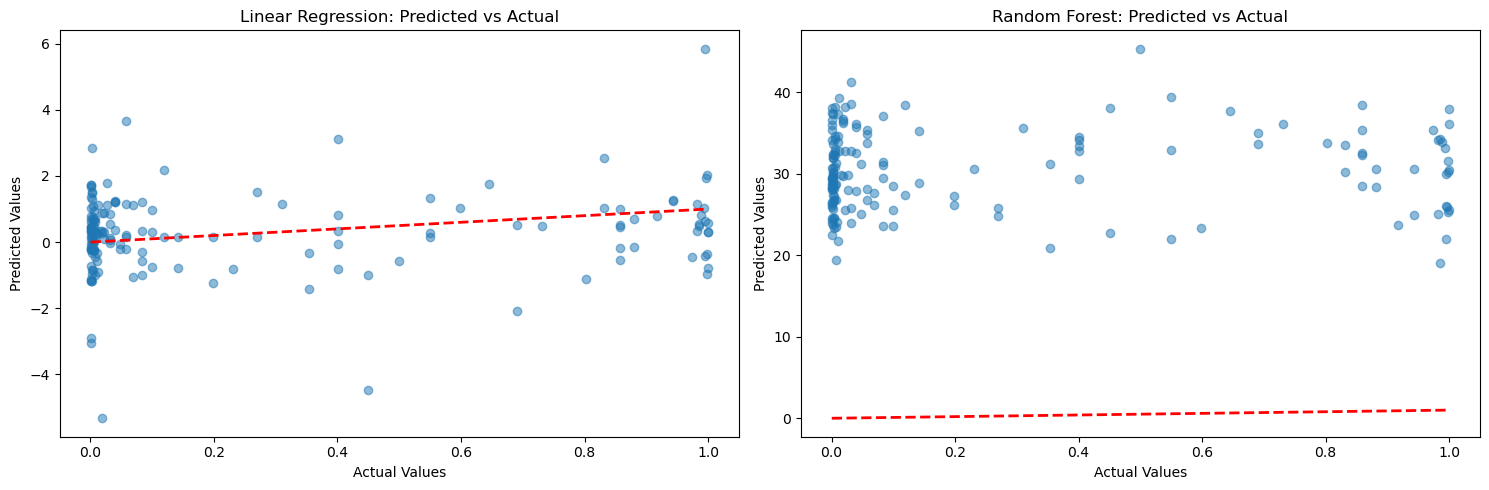

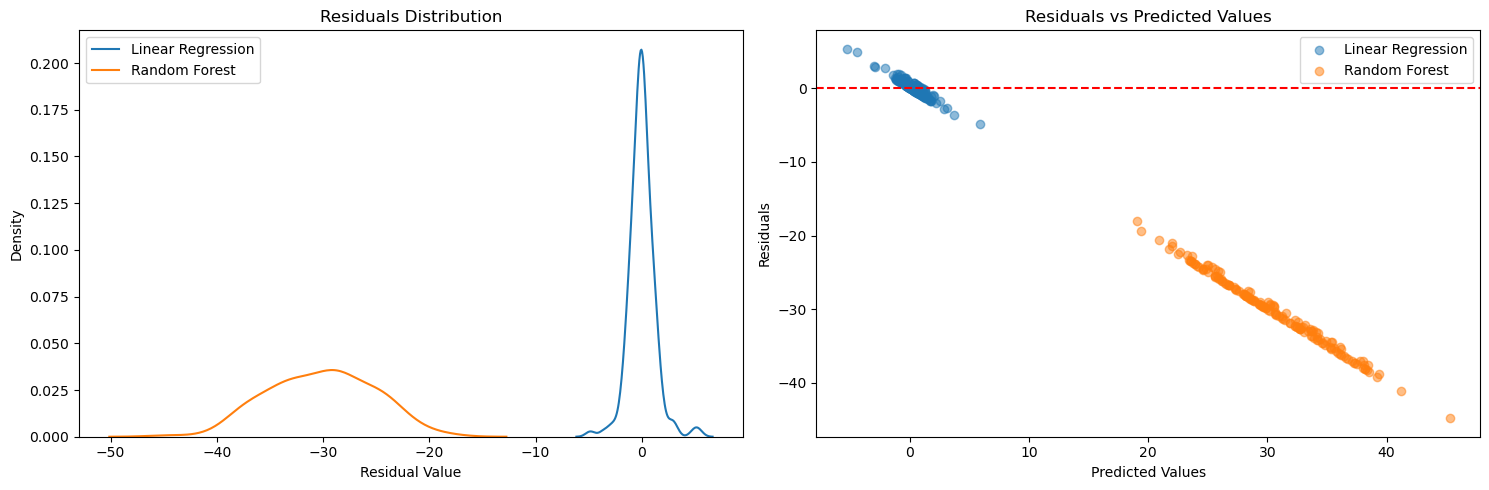


Top 10 Most Important Features (Linear Regression):
                                        Feature  Coefficient  Abs_Coefficient
3     ENSG00000004838.14|ZMYND10|protein_coding    -0.267171         0.267171
129     ENSG00000086205.18|FOLH1|protein_coding     0.178592         0.178592
332     ENSG00000114383.10|TUSC2|protein_coding     0.175046         0.175046
24     ENSG00000024526.17|DEPDC1|protein_coding     0.170422         0.170422
13      ENSG00000010322.16|NISCH|protein_coding    -0.163575         0.163575
38      ENSG00000043143.20|JADE2|protein_coding     0.155105         0.155105
1073     ENSG00000196196.3|HRCT1|protein_coding     0.152354         0.152354
870   ENSG00000166946.14|CCNDBP1|protein_coding     0.151876         0.151876
99      ENSG00000075618.18|FSCN1|protein_coding     0.149512         0.149512
241       ENSG00000105976.16|MET|protein_coding     0.147128         0.147128


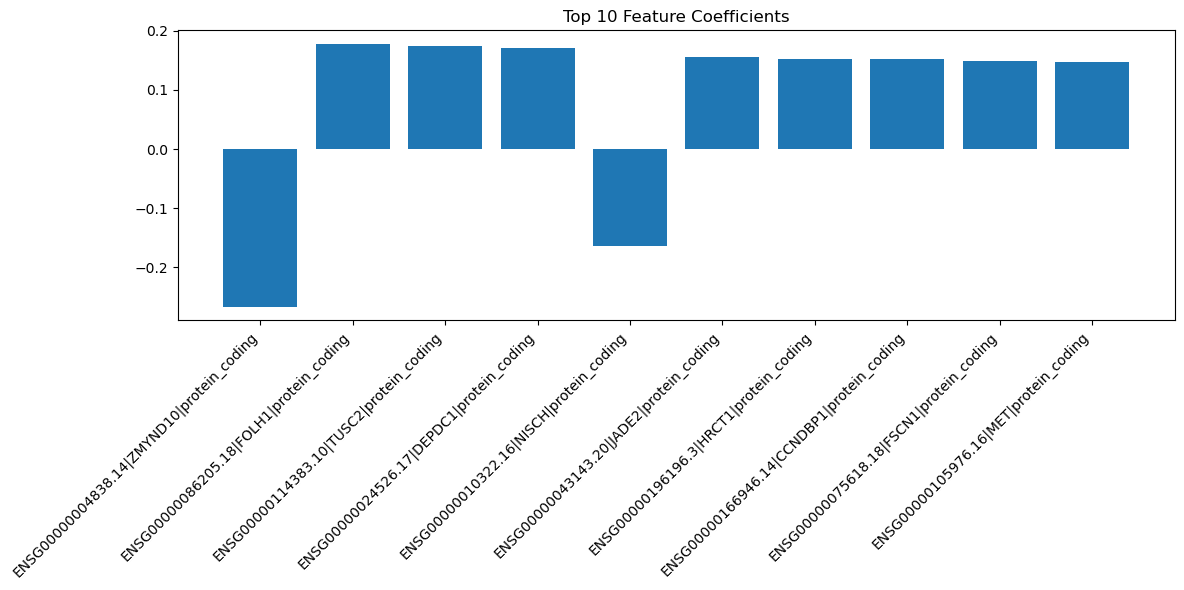


Linear Regression Model Summary:
Intercept: 0.3001
MSE: 1.4595
MAE: 0.8276
R²: -9.7815


In [ ]:

def compare_models(y_test, y_pred_lr, y_pred_rf):
    # 1. Print comparison metrics
    metrics_comparison = pd.DataFrame({
        'Linear Regression': {
            'MSE': mean_squared_error(y_test, y_pred_lr),
            'MAE': mean_absolute_error(y_test, y_pred_lr),
            'R²': r2_score(y_test, y_pred_lr)
        },
        'Random Forest': {
            'MSE': mean_squared_error(y_test, y_pred_rf),
            'MAE': mean_absolute_error(y_test, y_pred_rf),
            'R²': r2_score(y_test, y_pred_rf)
        }
    }).round(4)
    
    print("Model Performance Comparison:")
    print("=" * 50)
    print(metrics_comparison)
    
    # 2. Predictions vs Actual Plot
    plt.figure(figsize=(15, 5))
    
    # Linear Regression
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_lr, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Predicted vs Actual')
    
    # Random Forest
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_rf, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Random Forest: Predicted vs Actual')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Residuals Analysis
    residuals_lr = y_test - y_pred_lr
    residuals_rf = y_test - y_pred_rf
    
    plt.figure(figsize=(15, 5))
    
    # Residuals Distribution
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=pd.DataFrame({
        'Linear Regression': residuals_lr,
        'Random Forest': residuals_rf
    }))
    plt.title('Residuals Distribution')
    plt.xlabel('Residual Value')
    
    # Residuals vs Predicted
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_lr, residuals_lr, alpha=0.5, label='Linear Regression')
    plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, label='Random Forest')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 4. Linear Regression Coefficients Analysis
    if hasattr(X_train, 'columns'):
        coef_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': lr_model.coef_
        })
        coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
        coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
        
        print("\nTop 10 Most Important Features (Linear Regression):")
        print("=" * 50)
        print(coef_df.head(10))
        
        # Visualize coefficients
        plt.figure(figsize=(12, 6))
        plt.bar(range(len(coef_df['Coefficient'][:10])), coef_df['Coefficient'][:10])
        plt.xticks(range(len(coef_df['Feature'][:10])), coef_df['Feature'][:10], rotation=45, ha='right')
        plt.title('Top 10 Feature Coefficients')
        plt.tight_layout()
        plt.show()

# Run comparison analysis
compare_models(Y_test, Y_pred_lr, Y_pred_rf)

# Print Linear Regression model summary
print("\nLinear Regression Model Summary:")
print("=" * 50)
print(f"Intercept: {lr_model.intercept_:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R²: {r2_lr:.4f}")